In [27]:
import numpy as np
import torch
from matplotlib import pyplot as plt

In [28]:
x = np.linspace(-10,10,num=100)

In [29]:
#x**4 - 3*x**3 + 2
y = np.log(np.power(x,4) + np.power(x,3) + 2)

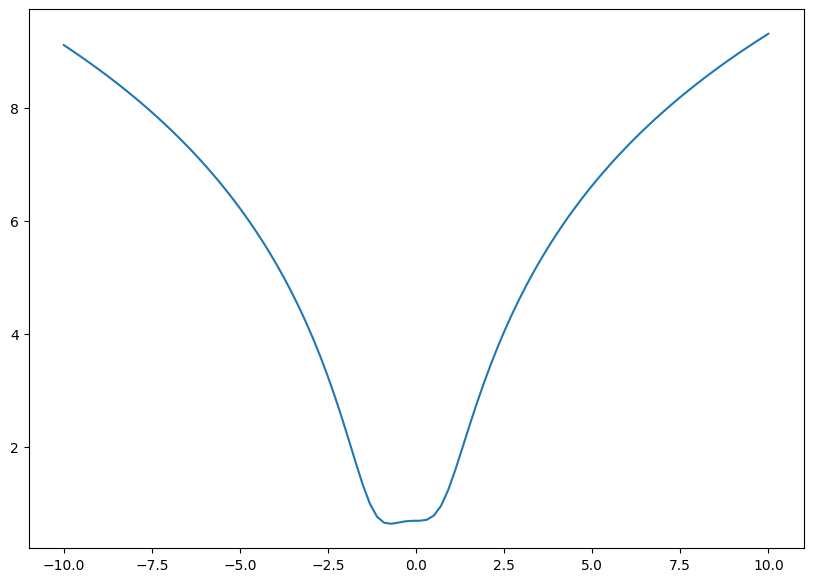

In [30]:
plt.figure(figsize=(10,7))
plt.plot(x,y)
#plt.savefig("/Users/brandonbrown/Dropbox/DeepReinforcementLearning/media/Appendix/grad_desc1.pdf")

In [31]:
def f(x): #A
    return np.log(np.power(x,4) + np.power(x,3) + 2)

def dfdx(x): #B
    return (4*np.power(x,3) + 3*np.power(x,2)) / f(x)

In [32]:
x = -9.41
lr = 0.001
epochs = 5000
for i in range(epochs):
    deriv = dfdx(x)
    x = x - lr * deriv

In [33]:
x

-0.7500000134493898

In [34]:
def nn(x,w1,w2):
    l1 = x @ w1 #A
    l1 = np.maximum(0,l1) #B
    l2 = l1 @ w2
    l2 = np.maximum(0,l2)
    return l2

w1 = np.random.randn(784,200) #C
w2 = np.random.randn(200,10)
x = np.random.randn(784) #D

#A Matrix multiplication
#B Non-linear activation function
#C Weight (parameter) matrix, initialized randomly
#D Random input vector


In [35]:
nn(x,w1,w2)

array([152.30592342,   0.        ,  94.32788215, 164.94308736,
         0.        , 348.50790526, 212.89389452,  12.73618848,
         0.        , 103.68418985])

In [36]:
def nn(x,w1,w2):
    l1 = x @ w1 #A
    l1 = torch.relu(l1) #B
    l2 = l1 @ w2
    l2 = torch.relu(l2)
    return l2

w1 = torch.randn(784,200,requires_grad=True) #C
w2 = torch.randn(200,10,requires_grad=True)
x = torch.randn(784) #D

#A Matrix multiplication
#B Non-linear activation function
#C Weight (parameter) matrix, initialized randomly
#D Random input vector

In [37]:
nn(x,w1,w2)

tensor([  0.0000, 157.4835,   0.0000, 149.3539, 185.1867,   0.0000,   0.0000,
          0.0000,   0.0000, 209.8111], grad_fn=<ReluBackward0>)

In [43]:
import torchvision as TV

def nn(x,w1,w2):
    l1 = x @ w1 #A
    l1 = torch.relu(l1) #B
    l2 = l1 @ w2
    return l2

w1 = torch.randn(784,200,requires_grad=True) #C
w2 = torch.randn(200,10,requires_grad=True)

#A Matrix multiplication
#B Non-linear activation function
#C Weight (parameter) matrix, initialized randomly
#D Random input vector

(-0.5, 27.5, 27.5, -0.5)

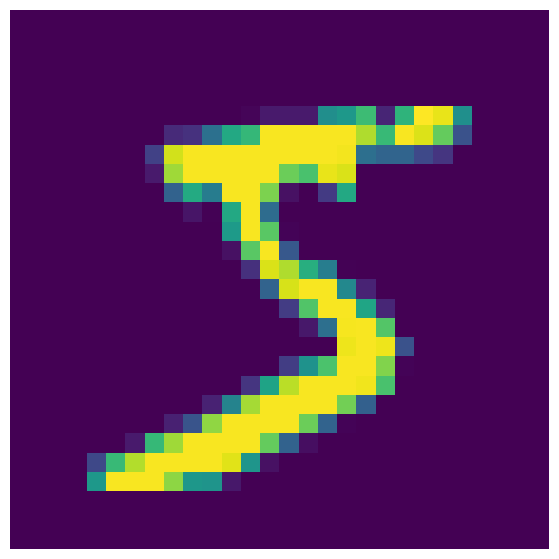

In [51]:
mnist_data = TV.datasets.MNIST("MNIST", train=True, download=False) #A
plt.figure(figsize=(10,7))
plt.imshow(mnist_data.train_data[0])
plt.axis('off')

In [52]:
lr = 0.0001
epochs = 2500
batch_size = 1000
losses = []
lossfn = torch.nn.CrossEntropyLoss() #B
for i in range(epochs):
    rid = np.random.randint(0,mnist_data.train_data.shape[0],size=batch_size) #C
    x = mnist_data.train_data[rid].float().flatten(start_dim=1) #D
    x /= x.max() #E
    pred = nn(x,w1,w2) #F
    target = mnist_data.train_labels[rid] #G
    loss = lossfn(pred,target) #H
    losses.append(loss)
    loss.backward() #I
    with torch.no_grad(): #J
        w1 -= lr * w1.grad #K
        w2 -= lr * w2.grad
        
#A Download and load the MNIST dataset
#B Set up a loss function
#C Get a set of random index values
#D Subset the data and flatten the 28x28 images into 784 vectors
#E Normalize the vector to be between 0 and 1
#F Make a prediction using the neural network
#G Get the ground-truth image labels
#H Compute the loss
#I Backpropagation
#J Do not compute gradients in this block
#K Gradient descent over the parameter matrices

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

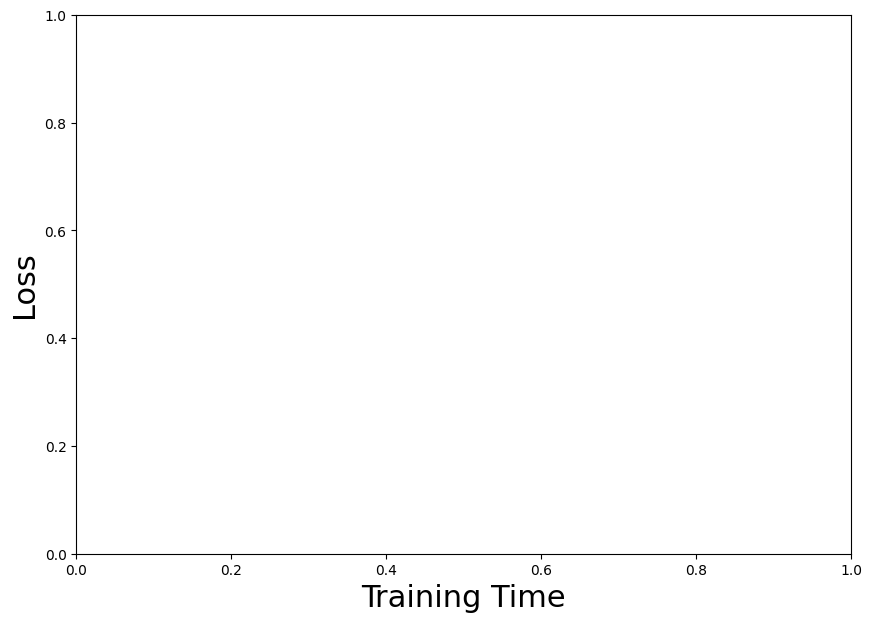

In [42]:
plt.figure(figsize=(10,7))
plt.xlabel("Training Time", fontsize=22)
plt.ylabel("Loss", fontsize=22)
plt.plot(losses)
# plt.savefig("/Users/brandonbrown/Dropbox/DeepReinforcementLearning/media/Appendix/loss1.png")

In [ ]:
batch_size = 100
rid = np.random.randint(0,mnist_test.test_data.shape[0],size=batch_size) #C
x = mnist_test.test_data[rid].float().flatten(start_dim=1) #D
x /= x.max() #E
pred = nn(x,w1,w2) #F
pred_label = torch.log_softmax(pred, dim=1).argmax(dim=1)
target = mnist_test.test_labels[rid] #G
num_cor = (pred_label == target).sum()

In [ ]:
num_cor.float() / 100.0

In [ ]:
mnist_data = TV.datasets.MNIST("MNIST", train=True, download=False) #A

lr = 0.001
epochs = 5000
batch_size = 500
losses = []
lossfn = torch.nn.CrossEntropyLoss() #B
optim = torch.optim.Adam(params=[w1,w2],lr=lr)
for i in range(epochs):
    rid = np.random.randint(0,mnist_data.train_data.shape[0],size=batch_size) #C
    x = mnist_data.train_data[rid].float().flatten(start_dim=1) #D
    x /= x.max() #E
    pred = nn(x,w1,w2) #F
    target = mnist_data.train_labels[rid] #G
    loss = lossfn(pred,target) #H
    losses.append(loss)
    loss.backward() #I
    optim.step()
    optim.zero_grad()
        
#A Download and load the MNIST dataset
#B Setup a loss function
#C Get a set of random index values
#D Subset the data and flatten the 28x28 images into 784 vectors
#E Normalize the vector to be between 0 and 1
#F Make a prediction using the neural network
#G Get the ground-truth image labels
#H Compute the loss
#I Backpropagate
#J Do not compute gradients in this block
#K Gradient descent over the parameter matrices